In [37]:
"""
1.	Import required libraries
2.	Read the csv
3.	Show the first record from the csv
4.	Show the number of rows and columns
5.	Find the amount of characters who fall under each alignment, you can use value_counts()
6.	Find only the good alignment characters
7.	Show only the first five records from the previous bullet point
8.	Select the top five heroes with the highest speed who have a good alignment
9.	Select five heroes with maximum power who have a good alignment
10.	Find out how many superheroes there are with power of 100 with good alignment
11.	Shape them what you got in point 10
12.	Show all records from point 10
13.	Retrieve the first five records with max power and has good alignment
14.	Draw a bar plot of all superheroes who are having good alignment and a max power of the top five heroes only , take the same object of point 13, show name and total in plot with green bars
15.	Extract villains who having a bad alignment
16.	Show first five records of point 15
17.	Show top five fastest super villains in terms of super speed
18.	Top five super villains in terms of intelligence
19.	Show who is most dangerous super villain after calculating their total (top 5 only)
20.	Draw a histogram for speed of super heroes having fig size 10.5, provide speed in histogram for only good alignment superheroes, title should be "distribution of speed", xlabel should be "speed"
21.	Draw a histogram for combat of super villains having fig size 10.5, provide combat in histogram for only bad alignment superheroes, title should be "distribution of combat", xlabel should be "combat"
22.	Explain how you retrieve data with the help of comments in almost each section

"""

'\n1.\tImport required libraries\n2.\tRead the csv\n3.\tShow the first record from the csv\n4.\tShow the number of rows and columns\n5.\tFind the amount of characters who fall under each alignment, you can use value_counts()\n6.\tFind only the good alignment characters\n7.\tShow only the first five records from the previous bullet point\n8.\tSelect the top five heroes with the highest speed who have a good alignment\n9.\tSelect five heroes with maximum power who have a good alignment\n10.\tFind out how many superheroes there are with power of 100 with good alignment\n11.\tShape them what you got in point 10\n12.\tShow all records from point 10\n13.\tRetrieve the first five records with max power and has good alignment\n14.\tDraw a bar plot of all superheroes who are having good alignment and a max power of the top five heroes only , take the same object of point 13, show name and total in plot with green bars\n15.\tExtract villains who having a bad alignment\n16.\tShow first five recor

In [38]:
"""1. Import required Libraries"""
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [39]:
"""2. Read the csv """
df = pd.read_csv("charcters_Stats.csv")
df

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
0,3-D Man,good,50,31,43,32,25,52,233
1,A-Bomb,good,38,100,17,80,17,64,316
2,Abe Sapien,good,88,14,35,42,35,85,299
3,Abin Sur,good,50,90,53,64,84,65,406
4,Abomination,bad,63,80,53,90,55,95,436
...,...,...,...,...,...,...,...,...,...
606,Yellowjacket,good,88,10,12,28,12,14,164
607,Yellowjacket II,good,50,10,35,28,31,28,182
608,Ymir,good,50,100,27,100,83,28,388
609,Zatanna,good,75,10,23,28,100,56,292


In [40]:
"""Show the first record from the csv"""
df.head(1)

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
0,3-D Man,good,50,31,43,32,25,52,233


In [41]:
"""4.	Show the number of rows and columns"""
column = df.shape[1]
row = df.shape[0]
print(F"There are {column} columns and {row} rows")

There are 9 columns and 611 rows


In [42]:
"""5.	Find the amount of characters who fall under each alignment, you can use value_counts() """
alignment = df['Alignment'].value_counts()
alignment

good       432
bad        165
neutral     11
Name: Alignment, dtype: int64

In [43]:
""" 6.	Find only the good alignment characters """
goodAlignment = df[['Name', 'Alignment']].loc[(df['Alignment']=='good')]
goodAlignment

,Name,Alignment
0,3-D Man,good
1,A-Bomb,good
2,Abe Sapien,good
3,Abin Sur,good
6,Adam Monroe,good
...,...,...
604,X-Man,good
606,Yellowjacket,good
607,Yellowjacket II,good
608,Ymir,good


In [44]:
""" 7. Show only the first five records from the previous bullet point """
goodAlignment.head()

,Name,Alignment
0,3-D Man,good
1,A-Bomb,good
2,Abe Sapien,good
3,Abin Sur,good
6,Adam Monroe,good


In [45]:
""" 8.	Select the top five heroes with the highest speed who have a good alignment """ 
speedy = df[['Name', 'Alignment', 'Speed']].loc[(df['Alignment']=='good')].sort_values('Speed', ascending=False)
speedy.head()


,Name,Alignment,Speed
231,Flash III,good,100
304,Jack of Hearts,good,100
295,Impulse,good,100
525,Stardust,good,100
447,Quicksilver,good,100


In [75]:
""" 9.	Select five heroes with maximum power who have a good alignment """ 
power = df[['Name', 'Alignment', 'Power']].loc[(df['Alignment']=='good')].loc[(df['Power'] == 100)]
power.head()

,Name,Alignment,Power
69,Beta Ray Bill,good,100
70,Beyonder,good,100
85,Black Bolt,good,100
129,Cable,good,100
185,Deadman,good,100


In [60]:
""" 10.	Find out how many superheroes there are with power of 100 with good alignment """
goodMaxPower = power[['Power', 'Name']].where(df['Alignment']=='good').groupby("Power").count().sort_values('Power', ascending=False).rename(columns={"Name": "# of Heroes"})
goodMaxPower.head(1)

,# of Heroes
Power,
100,33


In [61]:
""" 11.	Shape them what you got in point 10 """ 
goodMaxPower.shape

(83, 1)

In [62]:
""" 12.	Show all records from point 10 """
goodMaxPower

,# of Heroes
Power,
100,33
98,2
97,3
94,2
92,3
...,...
10,1
7,1
5,1


In [50]:
""" 13.	Retrieve the first five records with max power and has good alignment """ 
goodSuper = df[['Name', 'Power', 'Total']].loc[(df['Alignment']=='good')].sort_values(['Power', 'Total'], ascending=False).head()
goodSuper.head()

,Name,Power,Total
361,Martian Manhunter,100,581
525,Stardust,100,568
546,Thor,100,546
417,Nova,100,538
251,Goku,100,521


In [51]:
""" 14.	Draw a bar plot of all superheroes who are having good alignment and a max power of the top five heroes only , take the same object of point 13, show name and total in plot with green bars """


' 14.\tDraw a bar plot of all superheroes who are having good alignment and a max power of the top five heroes only , take the same object of point 13, show name and total in plot with green bars '

In [52]:
""" 15.	Extract villains who having a bad alignment """ 
evil = df[['Name', 'Alignment']].loc[(df['Alignment']=='bad')]
evil

,Name,Alignment
4,Abomination,bad
5,Abraxas,bad
11,Air-Walker,bad
16,Amazo,bad
17,Ammo,bad
...,...,...
586,Warp,bad
590,Weapon XI,bad
593,Willis Stryker,bad
605,Yellow Claw,bad


In [53]:
""" 16.	Show first five records of point 15 """ 
evil.head()

,Name,Alignment
4,Abomination,bad
5,Abraxas,bad
11,Air-Walker,bad
16,Amazo,bad
17,Ammo,bad


In [54]:
""" 17.	Show top five fastest super villains in terms of super speed """
evil_speed = df[['Name', 'Alignment', 'Speed', 'Total']].loc[(df['Alignment']=='bad')].sort_values(['Speed','Total'], ascending=False)
evil_speed

,Name,Alignment,Speed,Total
535,Superboy-Prime,bad,100,579
16,Amazo,bad,100,575
11,Air-Walker,bad,100,460
610,Zoom,bad,100,288
242,General Zod,bad,96,579
...,...,...,...,...
515,Spider-Carnage,bad,1,5
521,Spider-Woman IV,bad,1,5
576,Violator,bad,1,5
590,Weapon XI,bad,1,5


In [55]:
""" 18.	Top five super villains in terms of intelligence """ 
evil_smart = df[['Name', 'Alignment', 'Intelligence', 'Total']].loc[(df['Alignment']=='bad')].sort_values(['Intelligence','Total'], ascending=False)
evil_smart

,Name,Alignment,Intelligence,Total
386,Mister Mxyzptlk,bad,113,277
29,Apocalypse,bad,100,493
194,Doctor Doom,bad,100,429
321,Kang,bad,100,417
122,Brainiac,bad,100,416
...,...,...,...,...
515,Spider-Carnage,bad,1,5
521,Spider-Woman IV,bad,1,5
576,Violator,bad,1,5
590,Weapon XI,bad,1,5


In [56]:
""" 19.	Show who is most dangerous super villain after calculating their total (top 5 only) """
evilest = df[['Name', 'Alignment', 'Total']].loc[(df['Alignment']=='bad')].sort_values(['Total'], ascending=False)
evilest

,Name,Alignment,Total
535,Superboy-Prime,bad,579
242,General Zod,bad,579
16,Amazo,bad,575
203,Dormammu,bad,546
201,Doomsday,bad,545
...,...,...,...
103,Blizzard,bad,5
349,Luke Campbell,bad,5
181,Darkside,bad,5
390,Moloch,bad,5


[Text(0.5, 1.0, 'Distribution of Speed')]

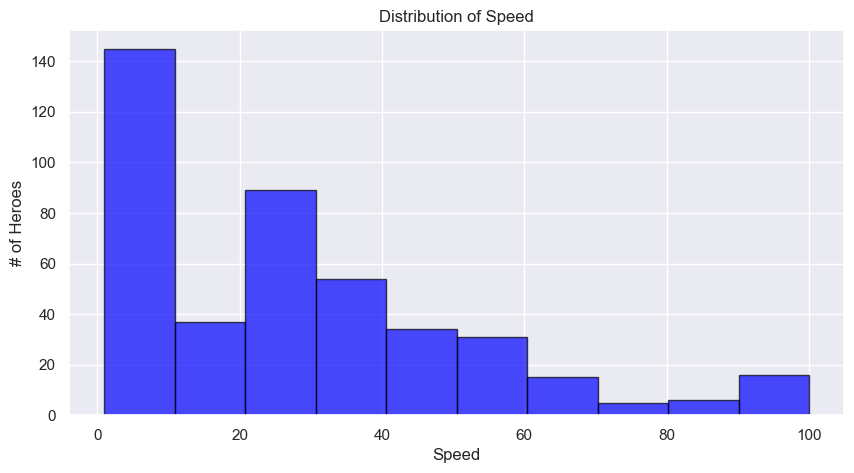

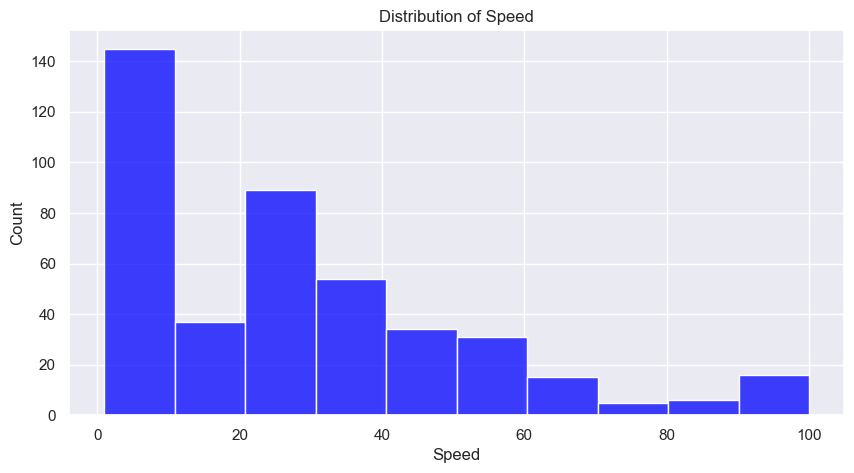

In [57]:
""" 20.	Draw a histogram for speed of super heroes having fig size 10.5, provide speed in histogram for only good alignment superheroes, title should be "distribution of speed", xlabel should be "speed" """ 
hero = df[['Speed']].loc[(df['Alignment']=='good')].sort_values('Speed', ascending=False)
#hero.head()

#using matplotlib
plt.figure(figsize=(10,5))
plt.hist(hero, bins=10, edgecolor='black', alpha=0.7, color='Blue')
plt.title('Distribution of Speed')
plt.xlabel('Speed')
plt.ylabel('# of Heroes')

#using seaborn
fig, ax  = plt.subplots(figsize=(10,5))
sns.histplot(hero, x='Speed', ax=ax, color='Blue').set(title='Distribution of Speed')



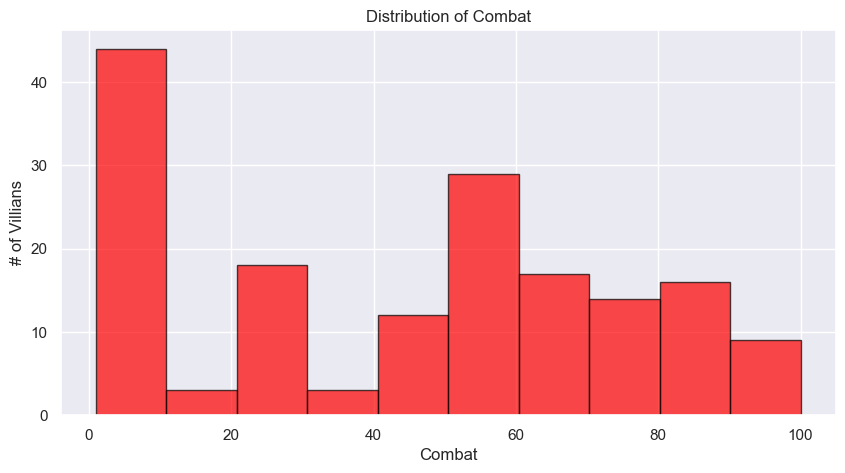

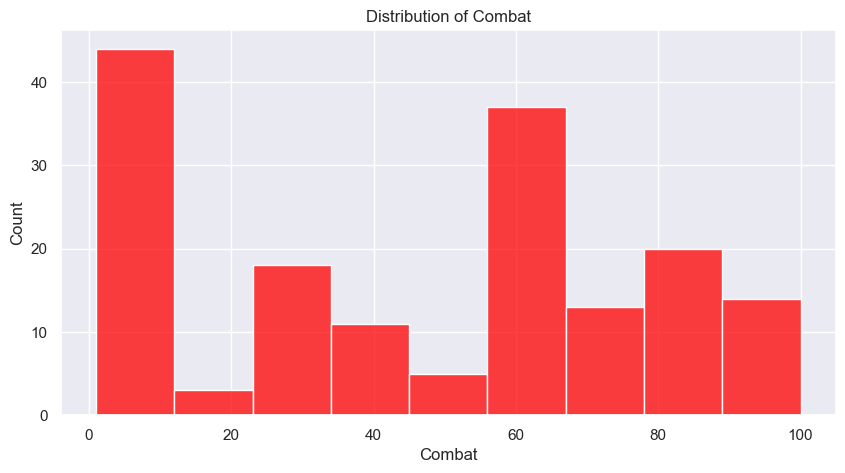

In [58]:
""" 21.	Draw a histogram for combat of super villains having fig size 10.5, provide combat in histogram for only bad alignment superheroes, title should be "distribution of combat", xlabel should be "combat" """
villian = df[['Combat']].loc[(df['Alignment']=='bad')].sort_values('Combat', ascending=False)
villian.head()

# using matplotlib
plt.figure(figsize=(10,5))
plt.hist(villian, bins=10, edgecolor='black', alpha=0.7, color='Red')
plt.title('Distribution of Combat')
plt.xlabel('Combat')
plt.ylabel('# of Villians')

#using seaborn
fig, ax  = plt.subplots(figsize=(10,5))
villian_plot = sns.histplot(villian, x='Combat', ax=ax, color='Red').set(title='Distribution of Combat')

